
### **Key Highlights of the Dataset**
1. **Diversity of Classes:**  
   - **Classes:** Myeloblasts (AML), Lymphoblasts (ALL), and Normal cells.  
   - Balanced class distribution (1000 images per class) ensures that the dataset is suitable for robust machine learning model training and evaluation.

2. **High Resolution & Quality:**  
   - **Resolution:** Minimum of 1024x1024 pixels provides detailed cellular morphology.  
   - **Staining & Magnification:** Wright-Giemsa staining under 100x oil immersion ensures high clarity of microscopic features.  
   - Expert-validated images ensure reliability and clinical relevance.

3. **Comprehensive Annotations:**  
   - Detailed annotations on nuclear patterns, cytoplasmic features, and cell measurements facilitate advanced feature extraction.  
   - Inclusion of abnormal indicators like Auer rods makes it ideal for detecting specific morphological abnormalities.

4. **Standardization:**  
   - Standardized imaging conditions and metadata provide consistency across samples.  
   - Multiple focal planes per sample enhance accuracy in detecting subtle abnormalities.

5. **Clinical Applications:**  
   - Early detection and monitoring of leukemia progression.  
   - Differentiation between subtypes (AML vs. ALL) for targeted treatment.  
   - Response assessment for personalized therapies.

6. **Machine Learning Potential:**  
   - Perfect for deep learning models (e.g., CNNs) for tasks like image classification, feature extraction, and anomaly detection.  
   - Opportunity for creating automated diagnostic tools that mimic hematopathologist-level accuracy.  

---

### **Possible Machine Learning Applications**
1. **Classification Models:**  
   - Build a CNN to classify cells into Myeloblasts, Lymphoblasts, and Normal cells.  
   - Use transfer learning with pre-trained models like ResNet, EfficientNet, or Inception.

2. **Feature Analysis:**  
   - Extract morphological features like nuclear-cytoplasm ratio or chromatin homogeneity for interpretable models.  

3. **Object Detection & Segmentation:**  
   - Use models like YOLO or Mask R-CNN to detect and segment specific cell types or abnormalities (e.g., Auer rods).  

4. **Disease Monitoring:**  
   - Develop time-series models by integrating imaging data with clinical data for disease progression analysis.  

5. **Explainable AI (XAI):**  
   - Implement techniques like Grad-CAM to provide heatmaps showing which parts of the cell influenced classification decisions.  

---

### **Steps for Dataset Utilization**
1. **Preprocessing:**  
   - Normalize the image data and resize to input dimensions suitable for the ML model (e.g., 224x224 for ResNet).  
   - Augment images with rotations, flips, and zooms to increase dataset variability.  

2. **Exploratory Data Analysis (EDA):**  
   - Visualize cell morphology for each class.  
   - Compare distributions of key features like nuclear size or chromatin texture.  

3. **Modeling:**  
   - Start with baseline models like Logistic Regression or Random Forest using extracted features.  
   - Progress to deep learning with architectures like ResNet, DenseNet, or Vision Transformers.  

4. **Evaluation:**  
   - Use metrics like accuracy, precision, recall, and F1-score.  
   - Employ ROC-AUC curves to assess model performance on multi-class classification tasks.  

5. **Deployment:**  
   - Develop a pipeline for real-time leukemia detection using a web or mobile application.  

---

### **Challenges and Considerations**
- **Data Imbalance in Real-World Scenarios:** While the dataset is balanced, real-world data often isn’t. Consider experimenting with imbalance scenarios for better generalization.  
- **Explainability:** In clinical settings, model interpretability is as important as accuracy. Include explainable AI techniques in your workflow.  
- **Overfitting:** High-resolution images might lead to overfitting in smaller models. Employ regularization and dropout layers.  


<div style="background-color: #f9f9fc; color: #333366; border-radius: 12px; margin: 20px auto; padding: 20px; border: 2px solid #4c4cff; max-width: 900px; font-family: Arial, sans-serif; line-height: 1.6;">
  <h2 style="text-align: center; color: #333366;">Import Necessary Libraries</h2>

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix


<div style="background-color: #f9f9fc; color: #333366; border-radius: 12px; margin: 20px auto; padding: 20px; border: 2px solid #4c4cff; max-width: 900px; font-family: Arial, sans-serif; line-height: 1.6;">
  <h2 style="text-align: center; color: #333366;">Define dataset path</h2>

In [2]:
DATASET_PATH = '/kaggle/input/blood-cell-images-for-cancer-detection'


<div style="background-color: #f9f9fc; color: #333366; border-radius: 12px; margin: 20px auto; padding: 20px; border: 2px solid #4c4cff; max-width: 900px; font-family: Arial, sans-serif; line-height: 1.6;">
  <h2 style="text-align: center; color: #333366;">set random set</h2>

In [3]:
SEED = 42
np.random.seed(SEED)


<div style="background-color: #f9f9fc; color: #333366; border-radius: 12px; margin: 20px auto; padding: 20px; border: 2px solid #4c4cff; max-width: 900px; font-family: Arial, sans-serif; line-height: 1.6;">
  <h2 style="text-align: center; color: #333366;">list classes</h2>

In [4]:
CLASSES = ['basophil', 'erythroblast', 'monocyte', 'myeloblast', 'seg_neutrophil']


<div style="background-color: #f9f9fc; color: #333366; border-radius: 12px; margin: 20px auto; padding: 20px; border: 2px solid #4c4cff; max-width: 900px; font-family: Arial, sans-serif; line-height: 1.6;">
  <h2 style="text-align: center; color: #333366;">Verfy dataset strecture</h2>

In [5]:
for class_name in CLASSES:
    print(f"{class_name}: {len(os.listdir(os.path.join(DATASET_PATH, class_name)))} images")


basophil: 1000 images
erythroblast: 1000 images
monocyte: 1000 images
myeloblast: 1000 images
seg_neutrophil: 1000 images


<div style="background-color: #f9f9fc; color: #333366; border-radius: 12px; margin: 20px auto; padding: 20px; border: 2px solid #4c4cff; max-width: 900px; font-family: Arial, sans-serif; line-height: 1.6;">
  <h2 style="text-align: center; color: #333366;">check for missing or corrupt files</h2>

In [6]:
for class_name in CLASSES:
    for img_file in os.listdir(os.path.join(DATASET_PATH, class_name)):
        try:
            img = cv2.imread(os.path.join(DATASET_PATH, class_name, img_file))
        except:
            print(f"Corrupt file: {img_file}")


<div style="background-color: #f9f9fc; color: #333366; border-radius: 12px; margin: 20px auto; padding: 20px; border: 2px solid #4c4cff; max-width: 900px; font-family: Arial, sans-serif; line-height: 1.6;">
  <h2 style="text-align: center; color: #333366;">define image size</h2>

In [7]:
IMG_HEIGHT, IMG_WIDTH = 128, 128


<div style="background-color: #f9f9fc; color: #333366; border-radius: 12px; margin: 20px auto; padding: 20px; border: 2px solid #4c4cff; max-width: 900px; font-family: Arial, sans-serif; line-height: 1.6;">
  <h2 style="text-align: center; color: #333366;">Initialze emppty arrays for data and labels</h2>

In [8]:
images = []
labels = []


<div style="background-color: #f9f9fc; color: #333366; border-radius: 12px; margin: 20px auto; padding: 20px; border: 2px solid #4c4cff; max-width: 900px; font-family: Arial, sans-serif; line-height: 1.6;">
  <h2 style="text-align: center; color: #333366;">Load image into arrays</h2>

In [9]:
for class_index, class_name in enumerate(CLASSES):
    folder_path = os.path.join(DATASET_PATH, class_name)
    for img_file in os.listdir(folder_path):
        img = cv2.imread(os.path.join(folder_path, img_file))
        img = cv2.resize(img, (IMG_HEIGHT, IMG_WIDTH))
        images.append(img)
        labels.append(class_index)
images = np.array(images)
labels = np.array(labels)


<div style="background-color: #f9f9fc; color: #333366; border-radius: 12px; margin: 20px auto; padding: 20px; border: 2px solid #4c4cff; max-width: 900px; font-family: Arial, sans-serif; line-height: 1.6;">
  <h2 style="text-align: center; color: #333366;">data preprocessing</h2>

In [10]:
images = images / 255.0


<div style="background-color: #f9f9fc; color: #333366; border-radius: 12px; margin: 20px auto; padding: 20px; border: 2px solid #4c4cff; max-width: 900px; font-family: Arial, sans-serif; line-height: 1.6;">
  <h2 style="text-align: center; color: #333366;">convert labels to categorical format</h2>

In [11]:
labels = to_categorical(labels, num_classes=len(CLASSES))


<div style="background-color: #f9f9fc; color: #333366; border-radius: 12px; margin: 20px auto; padding: 20px; border: 2px solid #4c4cff; max-width: 900px; font-family: Arial, sans-serif; line-height: 1.6;">
  <h2 style="text-align: center; color: #333366;">split data into trainm validation and test sets</h2>

In [12]:
X_train, X_temp, y_train, y_temp = train_test_split(images, labels, test_size=0.3, random_state=SEED)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=SEED)


<div style="background-color: #f9f9fc; color: #333366; border-radius: 12px; margin: 20px auto; padding: 20px; border: 2px solid #4c4cff; max-width: 900px; font-family: Arial, sans-serif; line-height: 1.6;">
  <h2 style="text-align: center; color: #333366;">Initialize image data generator for augmentation</h2>

In [13]:
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)
datagen.fit(X_train)


<div style="background-color: #f9f9fc; color: #333366; border-radius: 12px; margin: 20px auto; padding: 20px; border: 2px solid #4c4cff; max-width: 900px; font-family: Arial, sans-serif; line-height: 1.6;">
  <h2 style="text-align: center; color: #333366;">Display augmented images</h2>

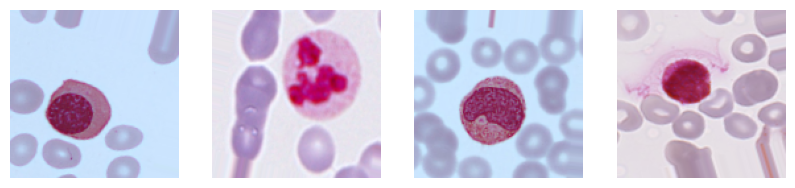

In [14]:
augmented_images = next(datagen.flow(X_train, y_train, batch_size=4))
fig, axes = plt.subplots(1, 4, figsize=(10, 5))
for i, img in enumerate(augmented_images[0]):
    axes[i].imshow(img)
    axes[i].axis('off')
plt.show()


<div style="background-color: #f9f9fc; color: #333366; border-radius: 12px; margin: 20px auto; padding: 20px; border: 2px solid #4c4cff; max-width: 900px; font-family: Arial, sans-serif; line-height: 1.6;">
  <h2 style="text-align: center; color: #333366;">Model building and training</h2>

In [15]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    BatchNormalization(),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    BatchNormalization(),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(len(CLASSES), activation='softmax')
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


<div style="background-color: #f9f9fc; color: #333366; border-radius: 12px; margin: 20px auto; padding: 20px; border: 2px solid #4c4cff; max-width: 900px; font-family: Arial, sans-serif; line-height: 1.6;">
  <h2 style="text-align: center; color: #333366;">compile the model</h2>

In [16]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


<div style="background-color: #f9f9fc; color: #333366; border-radius: 12px; margin: 20px auto; padding: 20px; border: 2px solid #4c4cff; max-width: 900px; font-family: Arial, sans-serif; line-height: 1.6;">
  <h2 style="text-align: center; color: #333366;">Display model summary</h2>

In [17]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 63, 63, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 30, 30, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 14, 14, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       6,422,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │           1,285 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,518,213 (24.87 MB)

 Trainable params: 6,517,765 (24.86 MB)

 Non-trainable params: 448 (1.75 KB)

<div style="background-color: #f9f9fc; color: #333366; border-radius: 12px; margin: 20px auto; padding: 20px; border: 2px solid #4c4cff; max-width: 900px; font-family: Arial, sans-serif; line-height: 1.6;">
  <h2 style="text-align: center; color: #333366;">train the model</h2>

In [18]:
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    validation_data=(X_val, y_val),
    epochs=20,
    steps_per_epoch=len(X_train) // 32
)


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


109/109 ━━━━━━━━━━━━━━━━━━━━ 30s 192ms/step - accuracy: 0.6822 - loss: 2.4284 - val_accuracy: 0.1973 - val_loss: 20.5178
Epoch 2/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8125 - loss: 1.0644 - val_accuracy: 0.1973 - val_loss: 20.0284
Epoch 3/20


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


109/109 ━━━━━━━━━━━━━━━━━━━━ 14s 119ms/step - accuracy: 0.8764 - loss: 0.6056 - val_accuracy: 0.1973 - val_loss: 13.6721
Epoch 4/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9375 - loss: 0.1137 - val_accuracy: 0.1973 - val_loss: 13.5691
Epoch 5/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 14s 119ms/step - accuracy: 0.9213 - loss: 0.3455 - val_accuracy: 0.2000 - val_loss: 12.1438
Epoch 6/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9375 - loss: 0.1552 - val_accuracy: 0.2000 - val_loss: 11.5538
Epoch 7/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 14s 122ms/step - accuracy: 0.9270 - loss: 0.2645 - val_accuracy: 0.3787 - val_loss: 6.7297
Epoch 8/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9062 - loss: 0.3756 - val_accuracy: 0.3813 - val_loss: 6.8357
Epoch 9/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 14s 121ms/step - accuracy: 0.9246 - loss: 0.3969 - val_accuracy: 0.8880 - val_loss: 0.5367
Epoch 10/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9688 - loss: 0.0990 - val_accura

<div style="background-color: #f9f9fc; color: #333366; border-radius: 12px; margin: 20px auto; padding: 20px; border: 2px solid #4c4cff; max-width: 900px; font-family: Arial, sans-serif; line-height: 1.6;">
  <h2 style="text-align: center; color: #333366;">plot training performance</h2>

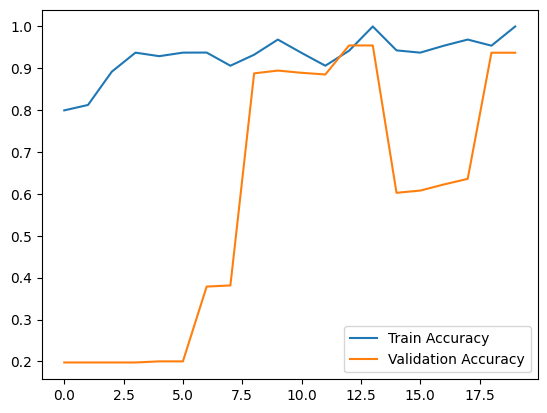

In [19]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()


<div style="background-color: #f9f9fc; color: #333366; border-radius: 12px; margin: 20px auto; padding: 20px; border: 2px solid #4c4cff; max-width: 900px; font-family: Arial, sans-serif; line-height: 1.6;">
  <h2 style="text-align: center; color: #333366;">evaluation and deployment</h2>

In [20]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9302 - loss: 0.4314
Test Accuracy: 0.93


<div style="background-color: #f9f9fc; color: #333366; border-radius: 12px; margin: 20px auto; padding: 20px; border: 2px solid #4c4cff; max-width: 900px; font-family: Arial, sans-serif; line-height: 1.6;">
  <h2 style="text-align: center; color: #333366;">Generate predictions</h2>

In [21]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step


<div style="background-color: #f9f9fc; color: #333366; border-radius: 12px; margin: 20px auto; padding: 20px; border: 2px solid #4c4cff; max-width: 900px; font-family: Arial, sans-serif; line-height: 1.6;">
  <h2 style="text-align: center; color: #333366;">Display classification report</h2>

In [22]:
print(classification_report(y_true, y_pred_classes, target_names=CLASSES))


                precision    recall  f1-score   support

      basophil       0.89      0.90      0.90       157
  erythroblast       0.83      0.98      0.90       161
      monocyte       0.99      0.80      0.88       142
    myeloblast       1.00      0.97      0.99       153
seg_neutrophil       0.97      0.99      0.98       137

      accuracy                           0.93       750
     macro avg       0.94      0.93      0.93       750
  weighted avg       0.93      0.93      0.93       750



<div style="background-color: #f9f9fc; color: #333366; border-radius: 12px; margin: 20px auto; padding: 20px; border: 2px solid #4c4cff; max-width: 900px; font-family: Arial, sans-serif; line-height: 1.6;">
  <h2 style="text-align: center; color: #333366;">Plot cunfusion matrix</h2>

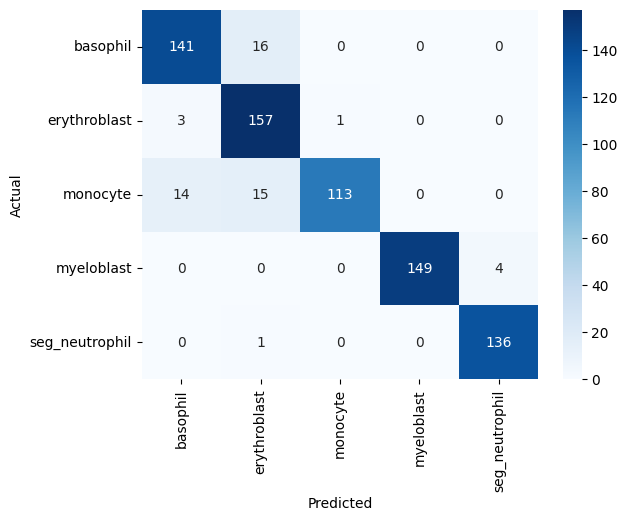

In [23]:
cm = confusion_matrix(y_true, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=CLASSES, yticklabels=CLASSES)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


<div style="background-color: #f9f9fc; color: #333366; border-radius: 12px; margin: 20px auto; padding: 20px; border: 2px solid #4c4cff; max-width: 900px; font-family: Arial, sans-serif; line-height: 1.6;">
  <h2 style="text-align: center; color: #333366;">save the trained model</h2>

In [24]:
model.save('blood_cell_classifier.h5')


<div style="background-color: #f9f9fc; color: #333366; border-radius: 12px; margin: 20px auto; padding: 20px; border: 2px solid #4c4cff; max-width: 900px; font-family: Arial, sans-serif; line-height: 1.6;">
  <h2 style="text-align: center; color: #333366;">Load the saved model</h2>

In [25]:
from tensorflow.keras.models import load_model
loaded_model = load_model('blood_cell_classifier.h5')


<div style="background-color: #f9f9fc; color: #333366; border-radius: 12px; margin: 20px auto; padding: 20px; border: 2px solid #4c4cff; max-width: 900px; font-family: Arial, sans-serif; line-height: 1.6;">
  <h2 style="text-align: center; color: #333366;">test with a new image</h2>

In [27]:
img = cv2.imread('/kaggle/input/blood-cell-images-for-cancer-detection/erythroblast/ERB_101031.jpg')
img = cv2.resize(img, (IMG_HEIGHT, IMG_WIDTH)) / 255.0
img = np.expand_dims(img, axis=0)
prediction = np.argmax(loaded_model.predict(img))
print(f"Predicted Class: {CLASSES[prediction]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 704ms/step
Predicted Class: erythroblast


<div style="background-color: #f9f9fc; color: #333366; border-radius: 12px; margin: 20px auto; padding: 20px; border: 2px solid #4c4cff; max-width: 900px; font-family: Arial, sans-serif; line-height: 1.6;">
  <h2 style="text-align: center; color: #333366;">load and preprocess the image</h2>

In [28]:
import matplotlib.pyplot as plt

# Load and preprocess the image
img_path = '/kaggle/input/blood-cell-images-for-cancer-detection/seg_neutrophil/NGS_0022.jpg'
img = cv2.imread(img_path)
img_resized = cv2.resize(img, (IMG_HEIGHT, IMG_WIDTH)) / 255.0
img_expanded = np.expand_dims(img_resized, axis=0)




<div style="background-color: #f9f9fc; color: #333366; border-radius: 12px; margin: 20px auto; padding: 20px; border: 2px solid #4c4cff; max-width: 900px; font-family: Arial, sans-serif; line-height: 1.6;">
  <h2 style="text-align: center; color: #333366;">make predication</h2>

In [29]:
# Make prediction
predictions = loaded_model.predict(img_expanded)
predicted_class = np.argmax(predictions)
confidence = predictions[0][predicted_class] * 100  # Convert to percentage

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


<div style="background-color: #f9f9fc; color: #333366; border-radius: 12px; margin: 20px auto; padding: 20px; border: 2px solid #4c4cff; max-width: 900px; font-family: Arial, sans-serif; line-height: 1.6;">
  <h2 style="text-align: center; color: #333366;">Display the predicated image</h2>

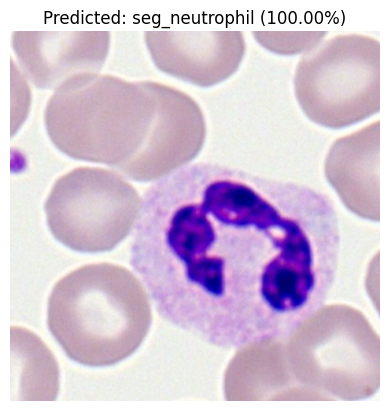

In [31]:

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title(f"Predicted: {CLASSES[predicted_class]} ({confidence:.2f}%)")
plt.show()

<div style="background-color: #f9f9fc; color: #333366; border-radius: 12px; margin: 20px auto; padding: 20px; border: 2px solid #4c4cff; max-width: 900px; font-family: Arial, sans-serif; line-height: 1.6;">
  <h2 style="text-align: center; color: #333366;">print detailed output</h2>

In [32]:
print(f"Predicted Class: {CLASSES[predicted_class]}")
print(f"Confidence: {confidence:.2f}%")

Predicted Class: seg_neutrophil
Confidence: 100.00%


---

## 🧑🏻‍💻 About the Author  
**Name:** Arif Mia  

🎓 **Profession:** Machine Learning Engineer & Data Scientist  

---

### 🔭 **Career Objective**  
🚀 My goal is to contribute to groundbreaking advancements in artificial intelligence and data science, empowering companies and individuals with data-driven solutions. I strive to simplify complex challenges, craft innovative projects, and pave the way for a smarter and more connected future.  

🔍 As a **Machine Learning Engineer** and **Data Scientist**, I am passionate about using machine learning, deep learning, computer vision, and advanced analytics to solve real-world problems. My expertise lies in delivering impactful solutions by leveraging cutting-edge technologies.  

---

### 💻 **Skills**  
- 🤖 **Artificial Intelligence & Machine Learning**  
- 👁️‍🗨️ **Computer Vision & Predictive Analytics**  
- 🧠 **Deep Learning & Natural Language Processing (NLP)**  
- 🐍 **Python Programming & Automation**  
- 📊 **Data Visualization & Analysis**  
- 🚀 **End-to-End Model Development & Deployment**  

---

### 🚧 **Featured Projects**  

📊 **Lung Cancer Prediction with Deep Learning**  
Achieved 99% accuracy in a computer vision project using 12,000 medical images across three classes. This project involved data preprocessing, visualization, and model training to detect cancer effectively.  

🌾 **Ghana Crop Disease Detection Challenge**  
Developed a model using annotated images to identify crop diseases with bounding boxes, addressing real-world agricultural challenges and disease mitigation.  

🛡️ **Global Plastic Waste Analysis**  
Utilized GeoPandas, Matplotlib, and machine learning models like RandomForestClassifier and CatBoostClassifier to analyze trends in plastic waste management.  

🎵 **Twitter Emotion Classification**  
Performed exploratory data analysis and built a hybrid machine learning model to classify Twitter sentiments, leveraging text data preprocessing and visualization techniques.  

---

### ⚙️ **Technical Skills**  

- 💻 **Programming Languages:** Python 🐍, SQL 🗃️, R 📈  
- 📊 **Data Visualization Tools:** Matplotlib 📉, Seaborn 🌊, Tableau 📊, Power BI 📊  
- 🧠 **Machine Learning & Deep Learning:** Scikit-learn 🤖, TensorFlow 🔥, PyTorch 🧩  
- 🗂️ **Big Data Technologies:** Hadoop 🏗️, Spark ⚡  
- 🚀 **Model Deployment:** Flask 🌐, FastAPI ⚡, Docker 🐳  

---

### 🌐 **Connect with Me**  

📧 **Email:** arifmiahcse@gmail.com 

🔗 **LinkedIn:** [www.linkedin.com/in/arif-miah-8751bb217](#)  

🐱 **GitHub:** [https://github.com/Arif-miad](#)  

📝 **Kaggle:** [https://www.kaggle.com/arifmia](#)  

🚀 Let’s turn ideas into reality! If you’re looking for innovative solutions or need collaboration on exciting projects, feel free to reach out.  



How does this look? Feel free to suggest changes or updates! 😊

<div style="background-color: #f9f9fc; color: #333366; border-radius: 12px; margin: 20px auto; padding: 20px; border: 2px solid #4c4cff; max-width: 900px; font-family: Arial, sans-serif; line-height: 1.6;">
  <h2 style="text-align: center; color: #333366;">How does this look? Feel free to suggest changes our updates! </h2>